# Ford GoBike System Data Exploration
## by Ahmed Sayed

Bay Area Motivate, LLC ("Motivate") operates the Bay Wheels bicycle sharing service. Motivate is committed to supporting bicycling as an alternative transportation option. And this document explores a dataset of Bay Wheels's trip on August 2019 with approximatley 210,600 rides.

## Preliminary Wrangling


First things first, let's do some wrangling on the dataset and make a deep look into it.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201908-baywheels-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(10)

(210563, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.2530,2019-09-01 16:23:27.4920,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.5120,2019-09-01 13:21:13.9310,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.9420,2019-09-01 13:21:12.4570,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No
3,75682,2019-08-31 14:22:02.2780,2019-09-01 11:23:24.5110,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No
4,30849,2019-08-31 18:47:08.0570,2019-09-01 03:21:17.6970,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No
5,17193,2019-08-31 20:52:40.7440,2019-09-01 01:39:14.5920,49,S Park St at 3rd St,37.780760,-122.394989,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3503,Customer,No
6,8959,2019-08-31 22:44:38.2130,2019-09-01 01:13:57.2480,323,Broadway at Kearny,37.798014,-122.405950,8,The Embarcadero at Vallejo St,37.799953,-122.398525,3028,Customer,No
7,9528,2019-08-31 22:04:15.4460,2019-09-01 00:43:03.8740,160,West Oakland BART Station,37.805318,-122.294837,237,Fruitvale BART Station,37.775232,-122.224498,1577,Customer,No
8,9542,2019-08-31 22:03:56.5060,2019-09-01 00:42:59.3280,160,West Oakland BART Station,37.805318,-122.294837,237,Fruitvale BART Station,37.775232,-122.224498,2534,Customer,No
9,4121,2019-08-31 23:26:05.7510,2019-09-01 00:34:46.8930,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,9651,Customer,No


In [4]:
# convert datetime columns
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [5]:
# convert duration time from seconds to minutes
df['duration_sec'] = df['duration_sec']/60
df.rename(columns={'duration_sec':'duration_min'}, inplace=True)
df.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,210563.000000,210563.000000,210563.000000,210563.000000,210563.000000,210563.000000,210563.000000,210563.000000
mean,13.891912,144.829481,37.770058,-122.354407,140.921145,37.770268,-122.353604,4048.755897
std,32.137063,120.128023,0.102810,0.217648,118.990674,0.102675,0.217245,3639.124465
min,1.016667,3.000000,37.311284,-122.473658,3.000000,37.311284,-122.473658,12.000000
25%,6.266667,50.000000,37.770407,-122.412408,44.000000,37.770407,-122.411306,1312.000000
50%,9.883333,104.000000,37.780526,-122.398285,99.000000,37.780787,-122.397437,2629.000000
75%,15.233333,240.000000,37.795393,-122.294837,233.000000,37.797280,-122.294837,9241.000000
max,1424.866667,459.000000,45.510000,-73.570000,459.000000,45.510000,-73.570000,11945.000000


### What is the structure of your dataset?

The dataset contains `14` (features duration_sec, start_time, end_time, ...etc) with `210563` records of bikes. However, most of the variables are numeric, but there's some coordinates with categorical features. Notice that the data contains a column called `bike_share_for_all_trip`, which tracks members who are enrolled in the Bike Share for All program for low-income residents. The `user_type` column contins 2 types of GoBike users, a customer is someone who holds a single-ride or day pass while a subscriber carries a monthly or annual pass.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the time duration for a bike to a specific distance (start and end). The other variable that will be helpful during our exploration is which user (customer or subscriber) uses GoBike rides the most.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that starting and ending time/location coordinates has the strongest effect on the duration. So, I'll extract some other features from those ones.

## Feature Engineering

Here, I'll perform multiple operations on some variables to extract more feature that will help us during the analysis.

In [6]:
# extract hours and days columns
df['hours'] = df.start_time.dt.hour
df['days'] = df.start_time.dt.dayofweek.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
ordered_days = {'days': ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']}
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordered_days['days'])
df['days'] = df['days'].astype(ordered_var)

In [7]:
# calculate euclidean distance from the starting and ending positions
deglen = 110.25
x = df['start_station_latitude'] - df['end_station_latitude']
y = (df['start_station_longitude'] - df['end_station_longitude']) * np.cos(deglen)
df['distance_km'] = np.sqrt(x*x + y*y)*deglen

## Univariate Exploration

#### Distribution of Ride Duration
Let's start by looking at the distribution of the interested variable.

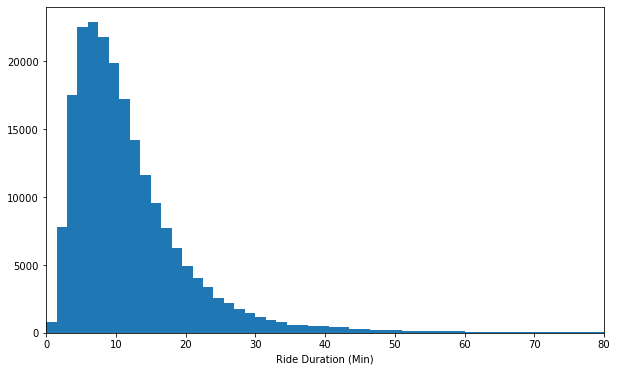

In [8]:
binsize = 1.5
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.figure(figsize=(10,6))
plt.hist(data=df, x='duration_min', bins=bins);
plt.xlim(0, 80)
plt.xlabel('Ride Duration (Min)');

The duration time has a long-tailed (right-skewed) distribution with almost 90% of the rides are below 23 minutes, while 97% are below 38 minutes. Also, within 30 and 50-minutes period, the distribution is heavily skewed to the right, leeding the idea that the bikes are generally used for short trips.

#### Bike Usage by Hour and by Day

Let's explore this by tracking bike usage by hour and by day of week.

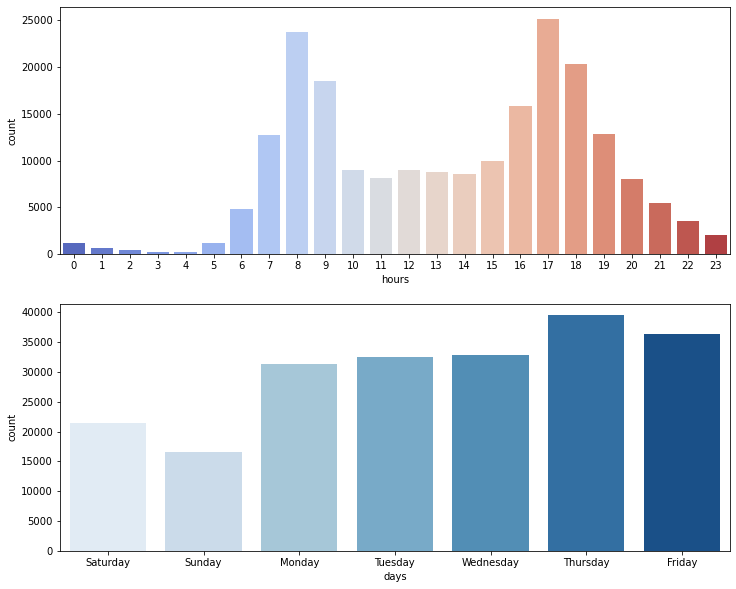

In [9]:
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(nrows=2, figsize = [12,10])
sb.countplot(data=df, x='hours', ax=ax[0],palette='coolwarm')
sb.countplot(data=df, x='days',  ax=ax[1], palette='Blues');

The rides per hour distribution is roughly a bimodal with peaks at 8 AM and 5 PM, which means that the bike share system is busiest during commute hours. And it's not a surprise that the quitest times are in the night early hours. The second bottom figure above shows us that the ride usage over weekdays is greater than over weekends (commute days).

#### Bike usage by Customers and Subscribers

Now, I'll go further and reveal more information about GoBike users.

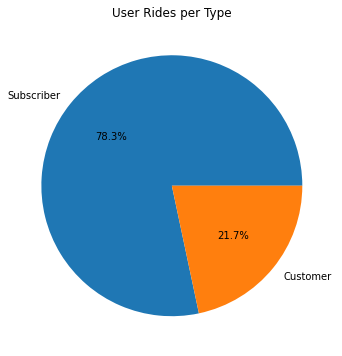

In [10]:
plt.figure(figsize=(8,6))
vals = df['user_type'].value_counts().values
plt.pie(vals, labels=df['user_type'].value_counts().index,autopct='%1.1f%%');
plt.title('User Rides per Type');

It's obvious that the majority of the rides are made by the subscribers while only 21.7% of the rides come from customers. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

As we saw above, the duration distribution is strongly right-skewed, and that's meaningful that above 90% of the rides are used in short trips. In the bike usage per hour and per day are also seems okay. Overall all point are usual and there's no need to perform any transformation on the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When looking at the duration variable, I noticed that the duration in minutes would be more helpful to explore some more info about the rides. In the starting time, the extraction of day and hour of the rides also were beneficial to peek more into the data. In all parts, the dataset looks clean and tidy as far as so good.

## Bivariate Exploration

At first, let's look at some pairwise correlation between the numeric variables in the dataset.

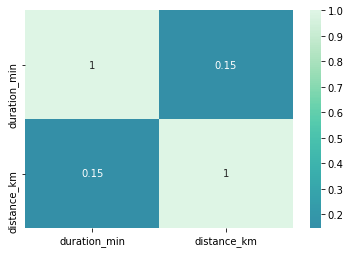

In [11]:
sb.heatmap(df[['duration_min', 'distance_km']].corr(), annot=True, cmap='mako', center=0);

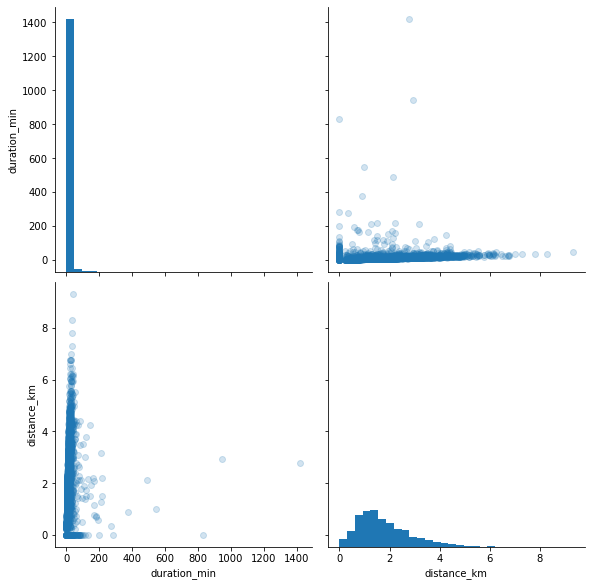

In [12]:
# plot matrix: sample 5000 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 5000, replace = False)
df_samp = df.loc[samples,:]

numeric_vars = ['duration_min', 'distance_km']
g = sb.PairGrid(data = df_samp, vars = numeric_vars, height=4);
g = g.map_diag(plt.hist, bins = 30);
g.map_offdiag(plt.scatter, alpha=1/5);

Unfortunately, the correlation between the distance and the ride duration is 1.5 which is there's a weak relationship between the features being explored. However, the scatter plot has shown us there's positive weak relationship between the two variables.

Next, we're going to explore some categorical features and look for any relationships in the data.

<Figure size 720x720 with 0 Axes>

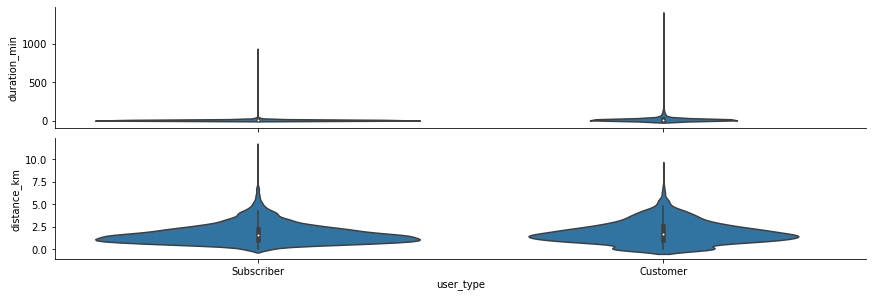

In [13]:
# plot matrix of numeric features against categorical features using a sample of 10000
samples = np.random.choice(df.shape[0], 10000, replace = False)
df_samp = df.loc[samples,:]
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.violinplot(x, y, color=base_color);
plt.figure(figsize=(10, 10));
g = sb.PairGrid(data=df_samp , y_vars=numeric_vars, x_vars='user_type', height=2, aspect=6);
g.map(boxgrid);

In the previous figure, both subscribers and customers cover the same distance.

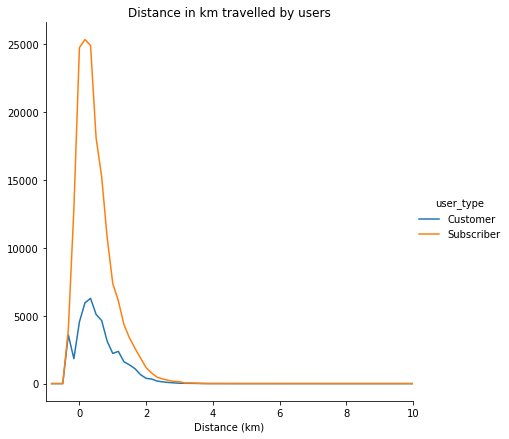

In [14]:
def freq_poly(x, bins=10, **kwargs):
    if type(bins)==int:
        bins=np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:1])/2
    data_bins=pd.cut(x, bins, right=False, include_lowest = True)
    counts = x.groupby(data_bins).count()
    plt.errorbar(x=bin_centers, y=counts, **kwargs)
bin_edges = np.arange(-1, df['distance_km'].max()+1/3, 1/3)
g = sb.FacetGrid(data=df, hue = 'user_type', height=6)
g.map(freq_poly, "distance_km", bins = bin_edges)
g.add_legend()
plt.xlabel('Distance (km)')
plt.xlim(-1,10)
plt.title('Distance in km travelled by users');

The above plot shows us the actual ride distance by each user (customer or subscriber).

Next, let's look at the overall rides distance in terms of both hours and days of week.

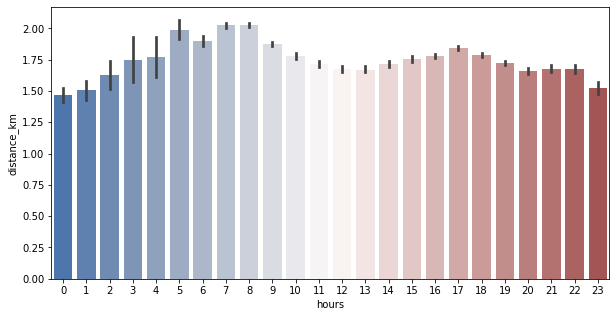

In [15]:
# plot distance vs hours
plt.figure(figsize = (10,5))
base_color = sb.color_palette()[0]
sb.barplot(data=df, x='hours', y='distance_km', color=base_color, palette='vlag');

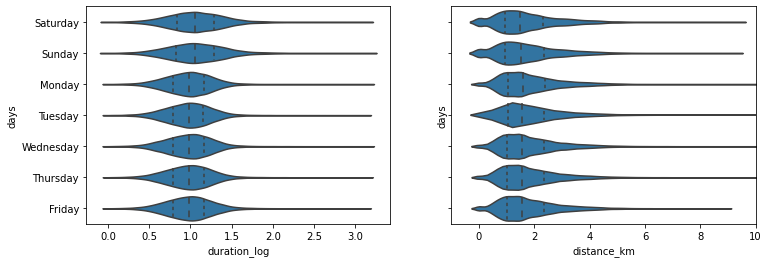

In [16]:
# compute additional column from logarithmic duration to see the graphs clearly
df['duration_log'] = np.log10(df['duration_min'])
fig, ax = plt.subplots(ncols=2, figsize = [12,4], sharey=True)
sb.violinplot(data=df, x='duration_log', y='days', inner = 'quartile', color=base_color, ax=ax[0]);
sb.violinplot(data=df, x='distance_km', y='days', inner = 'quartile', color=base_color,ax=ax[1]);
plt.xlim(-1,10);

It's very clear that the distance for each day is the same with slight difference in the duration for all the rides.

Let's see more insights about the categorical feature that has been extracted before.

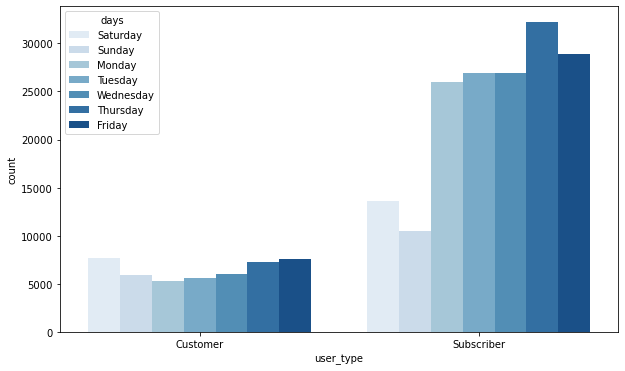

In [17]:
# plot features user_type vs days
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='user_type', hue='days', palette='Blues');

Thursday and Saturday is the days that has most rides by subscribers and customers respectively.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It's clear that the relationship between the numeric variables is very weak 0.15. However, the scatter plot shows us there's a positive relationship between the two. We also can see that most of the rides take less time which emphasizes our assumption, the bikes used for mostly short trips (1.5 km) as we see, however, there are users who go for more as well.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In the violin plots, there were expected results as to both subscribers and customers travel the same distance. In spite of the insights, there are many outliers in all rides with the duration graph. And in the last figure, we can ensure that the subscribers are the most ride the bikes. And lastly, most of the users travel for approximately (1.75 kilometers) in (3.7 minutes) on all days of the week.

## Multivariate Exploration


In this part, I want to explore more relationships between the categorical features with the distance and duration.

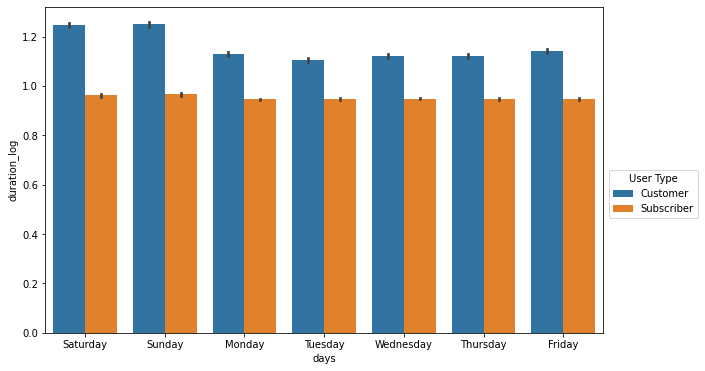

In [18]:
# plot the user_type in terms of days and log duration
fig = plt.figure(figsize = [10,6])
g = sb.barplot(data = df, x = 'days', y = 'duration_log', hue = 'user_type');
plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0, title='User Type');

After looking at the duration, the subscribers seem to spend less time in terms of duration with approximately (2.5 minutes). While the customers' rides spike more on Saturday and Sunday.

Moving on, let's see more about the duration with the hours per day.

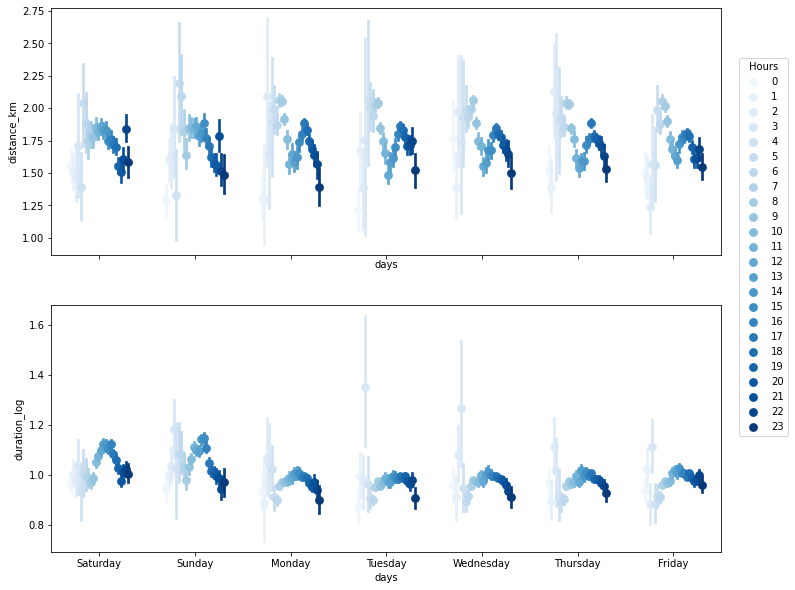

In [19]:
# plot the duration in terms of days and hours
fig, ax = plt.subplots(nrows=2, figsize = [12,10], sharex=True)
sb.pointplot(data = df, x = 'days', y = 'distance_km', hue = 'hours', palette = 'Blues',
             linestyles = '', dodge = 0.6, ax = ax[0]);
ax[0].legend([],[], frameon=False)
sb.pointplot(data = df, x = 'days', y = 'duration_log', hue = 'hours', palette = 'Blues',
             linestyles = '', dodge = 0.6, ax=ax[1]);
ax[1].legend([],[], frameon=False)
lines = []
labels = []
axLine, axLabel = ax[0].get_legend_handles_labels()
lines.extend(axLine)
labels.extend(axLabel)
plt.legend(lines, labels,bbox_to_anchor=(1.1, 2),borderaxespad=0, title='Hours');

Here, we can see that the distance is slightly monotonically changes with the logarithmic duration in the night and early mornings hours.

<Figure size 720x576 with 0 Axes>

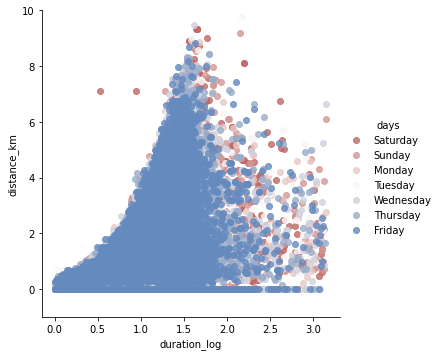

In [20]:
# plot the distance vs duration interms of days
plt.figure(figsize=(10,8));
g = sb.FacetGrid(data = df, hue = 'days', height = 5, palette='vlag_r');
g.map(sb.regplot, 'duration_log', 'distance_km',fit_reg=False);
g.add_legend();
plt.ylim(-1,10);

A strong positive relationship has been observed between the distance and the logarithmic duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

First thing, the customers are the most users that spend more time on the bikes over the subscribers with (2.5 minutes) on average. Noticed that, all users seem to travel more distance in early morning hours, which means that they use the bikes to do some cycling workout after waking up. As well as, zooming in the last figure to eliminate any outliers shows us that there's a positive relationship between the two features.


### Were there any interesting or surprising interactions between features?

Interestingly, the customers spend more time on the bikes with (3 minutes) on average and this is an unexpected relationship since the subscribers are the most who ride the bikes. Which concludes that whoever rides more not necessarily spend more time riding the bike. The expected result happens when the logarithmic duration goes up as distance rises, so the relationship against the distance over all days looks positively strong.